<a href="https://colab.research.google.com/github/paulomarc49/ETo_climate/blob/main/ETo_weather_tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

numpy_data = np.load('/content/drive/MyDrive/ETo/data_april_2024.npy')
print("Shape of the input data: ", numpy_data.shape)

# Input data is an array of three dimentions with the shape: ( d * x, y, 8 variables * 24 hours ) d: day, x: Pixel "X", y: Pixel "Y", 8 * 24 number of variables per hour
d, x, y, n_variables = 30, 171, 171, 192
# Reshape to: d*x, y, 3, 2
numpy_data = numpy_data.reshape(d, x, y, 24, 8)
# Flattering
numpy_data = numpy_data.transpose(0, 3, 1, 2, 4).reshape(-1, 8)
print("Shape of the flattered input data: ", numpy_data.shape)

Shape of the input data:  (5130, 171, 192)
Shape of the flattered input data:  (21053520, 8)


In [19]:
# Data convertion from numpy to pandas

pandas_data = pd.DataFrame(numpy_data, columns=['Net_Radiation',
                                                'Ground_Flux',
                                                'Air_Temperature',
                                                'Vapor_Pressure_Curve',
                                                'Psycometric_Constant',
                                                'Saturated_Vapor_Pressure',
                                                'Actual_Vapor_Pressure',
                                                'Wind_Speed'])
pandas_data

,Net_Radiation,Ground_Flux,Air_Temperature,Vapor_Pressure_Curve,Psycometric_Constant,Saturated_Vapor_Pressure,Actual_Vapor_Pressure,Wind_Speed
0,-0.700287,0.002890,23.271332,0.172413,0.065426,2.856878,2.692569,1.362056
1,-0.711534,0.005719,23.122452,0.171082,0.065202,2.831687,2.681479,1.451124
2,-0.707647,0.006886,23.145279,0.171267,0.065523,2.835127,2.697322,1.356154
3,-0.716827,0.012507,23.134506,0.171155,0.066007,2.832945,2.725280,1.136015
4,-0.721148,0.014556,23.085724,0.170706,0.066254,2.824399,2.742847,1.007508
...,...,...,...,...,...,...,...,...
21053515,0.057175,0.028322,25.533035,0.193975,0.066171,3.269948,3.038742,1.163321
21053516,0.058424,0.029169,25.599014,0.194639,0.066178,3.282785,3.027036,1.161476
21053517,0.025057,0.047791,24.949921,0.188349,0.066186,3.161943,2.971297,1.102412
21053518,-0.004933,0.067797,24.265030,0.181598,0.066191,3.031817,2.917109,1.168465


In [7]:
pandas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053520 entries, 0 to 21053519
Data columns (total 8 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Net_Radiation             float32
 1   Ground_Flux               float32
 2   Air_Temperature           float32
 3   Vapor_Pressure_Curve      float32
 4   Psycometric_Constant      float32
 5   Saturated_Vapor_Pressure  float32
 6   Actual_Vapor_Pressure     float32
 7   Wind_Speed                float32
dtypes: float32(8)
memory usage: 642.5 MB


In [8]:
pandas_data.describe()

,Net_Radiation,Ground_Flux,Air_Temperature,Vapor_Pressure_Curve,Psycometric_Constant,Saturated_Vapor_Pressure,Actual_Vapor_Pressure,Wind_Speed
count,2.105352e+07,2.105352e+07,2.105352e+07,2.105352e+07,2.105352e+07,2.105352e+07,2.105352e+07,2.105352e+07
mean,4.236142e-01,-7.851923e-03,2.207697e+01,1.685924e-01,6.122800e-02,2.805290e+00,2.447902e+00,1.154011e+00
std,6.563027e-01,9.671303e-02,6.358088e+00,4.861103e-02,8.379120e-03,8.863202e-01,6.629540e-01,9.046592e-01
min,-1.200979e+00,-1.656777e+00,-5.672287e+00,3.056761e-02,3.616091e-02,4.002063e-01,3.821206e-01,6.322118e-03
25%,2.489727e-02,-5.969570e-02,2.028244e+01,1.470040e-01,5.886363e-02,2.380278e+00,2.113685e+00,5.978501e-01
50%,6.507351e-02,2.349865e-02,2.341351e+01,1.736895e-01,6.517101e-02,2.881051e+00,2.743136e+00,9.124689e-01
75%,7.781397e-01,4.572795e-02,2.592645e+01,1.980257e-01,6.562875e-02,3.348670e+00,2.923273e+00,1.361939e+00
max,2.859697e+00,1.020817e+00,3.388864e+01,2.945696e-01,6.750263e-02,5.286392e+00,3.805421e+00,1.362510e+01


In [30]:
# Function for plotting one day SOM clusters:

def plot_one_day_(numpy_data, labels):
    d, x, y, n_variables = 30, 171, 171, 192
    classes = labels
    # Flattering original array
    variables_flat = numpy_data
    variables_flat = variables_flat[0:701784]
    print(f"Input data flattered shape: {variables_flat.shape}")
    # Reshape labels array
    classes = classes.reshape(-1, 1)
    classes = classes[0:701784]
    print(f"Output layer label:         {classes.shape}")
    # Join of flattered original array and labels array
    array_con_etiquetas = np.concatenate((variables_flat, classes), axis=-1)
    print(f"Joined array:               {array_con_etiquetas.shape}")
    # Reshape of joined array
    array_con_etiquetas = array_con_etiquetas.reshape(1, 24, x, y,9)
    array_con_etiquetas = array_con_etiquetas.transpose(0, 2, 3, 1, 4)
    array_con_etiquetas = array_con_etiquetas.reshape(1*x, y, 24*9)
    print(f"Reshaped joined array:      {array_con_etiquetas.shape}")
    # Plot code
    import matplotlib.pyplot as plt
    data = array_con_etiquetas[:,:,0] # Plot at a time of: 12:00 98
    plt.figure(figsize=(7,5))
    plt.imshow(data, cmap='gnuplot2') #turbo nipy_spectral gist_rainbow rainbow interpolation='bilinear
    plt.colorbar(label='ETo clusters')
    plt.title(f'ETo wheather heatmap with distortion: {distortion}')
    plt.xlabel('Pixel X')
    plt.ylabel('Pixel Y')
    plt.show()

In [21]:
# Pipeline
from sklearn.preprocessing     import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing     import StandardScaler
from sklearn.pipeline          import Pipeline
from sklearn.cluster           import KMeans
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")

In [22]:
# Number of clusters k to test
k_values = [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36]
distortions = []

variables_flat = numpy_data
variables_flat = variables_flat[0:701784]
pandas_data=pandas_data.iloc[0:701784]

# Distortion for each k value
for k in tqdm(k_values, desc="Training SOM"):
    model = Pipeline([
                        ('scal', StandardScaler()),
                        ('kmeans', KMeans(n_clusters=k, max_iter=600, random_state=42, tol=0.00001))
                    ])
    kmeans_train            = model.fit_transform(pandas_data)
    distorsion_kmeans_train = model.named_steps['kmeans'].inertia_
    distortions.append(distorsion_kmeans_train)

Training SOM: 100%|██████████| 17/17 [00:30<00:00,  1.78s/it]


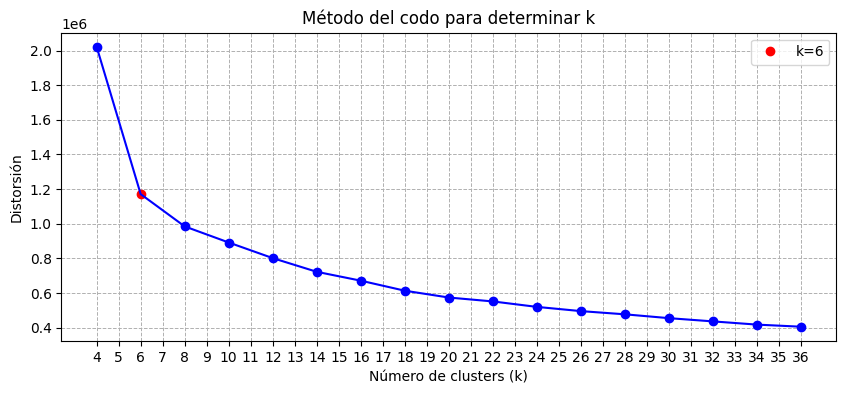

In [23]:
# Plot the distortion in terms of k
plt.figure(figsize=(10, 4))

# Define x-values and plot all points except the one at x = 6
x_values = range(4, 38, 2)
for x, y in zip(x_values, distortions):
    if x == 6:
        plt.plot(x, y, 'ro', label='k=6')
    else:
        plt.plot(x, y, 'bo')

plt.plot(x_values, distortions, 'b-')
plt.xticks(range(4, 37))
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Distorsión')
plt.title('Método del codo para determinar k')
plt.legend()
plt.show()

## 3.2. Evaluación del mejor modelo

Input data flattered shape: (701784, 8)
Output layer label:         (701784, 1)
Joined array:               (701784, 9)
Reshaped joined array:      (171, 171, 216)


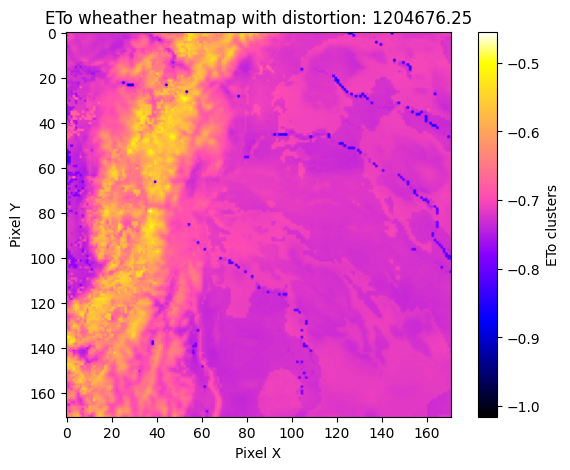

In [31]:
model = Pipeline([
                    ('scal', StandardScaler()),
                    ('kmeans', KMeans(n_clusters=6, max_iter=10000, random_state=102, tol=0.0001))
                 ])
kmeans_train            = model.fit_transform(pandas_data)
labels_kmeans_train     = model.named_steps['kmeans'].labels_
distortion              = model.named_steps['kmeans'].inertia_

plot_one_day_(numpy_data, labels_kmeans_train)

Input data flattered shape: (701784, 8)
Output layer label:         (701784, 1)
Joined array:               (701784, 9)
Reshaped joined array:      (171, 171, 216)


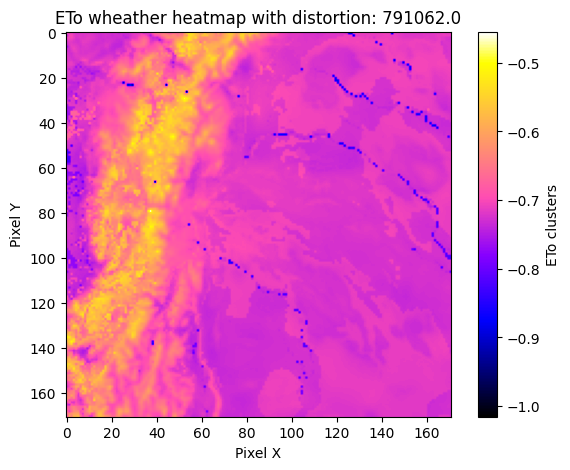

In [32]:
model = Pipeline([
                    ('scal', StandardScaler()),
                    ('kmeans', KMeans(n_clusters=12, max_iter=10000, random_state=2024, tol=0.0001)),
                 ])
kmeans_train            = model.fit(pandas_data)
labels_kmeans_train     = model.named_steps['kmeans'].labels_
distortion              = model.named_steps['kmeans'].inertia_

plot_one_day_(numpy_data, labels_kmeans_train)

## 4. SOM implementation with SOM-SKLEARN BETA VERSION

In [33]:
# Pipeline
from sklearn.preprocessing     import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing     import StandardScaler
from sklearn.pipeline          import Pipeline
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")


In [34]:
# Data reconvertion from numpy to pandas

batches = np.array_split(numpy_data, 90)
pandas_data = pd.DataFrame(batches[0], columns=['Net_Radiation',
                                                'Ground_Flux',
                                                'Air_Temperature',
                                                'Vapor_Pressure_Curve',
                                                'Psycometric_Constant',
                                                'Saturated_Vapor_Pressure',
                                                'Actual_Vapor_Pressure',
                                                'Wind_Speed'])
pandas_data

,Net_Radiation,Ground_Flux,Air_Temperature,Vapor_Pressure_Curve,Psycometric_Constant,Saturated_Vapor_Pressure,Actual_Vapor_Pressure,Wind_Speed
0,-0.700287,0.002890,23.271332,0.172413,0.065426,2.856878,2.692569,1.362056
1,-0.711534,0.005719,23.122452,0.171082,0.065202,2.831687,2.681479,1.451124
2,-0.707647,0.006886,23.145279,0.171267,0.065523,2.835127,2.697322,1.356154
3,-0.716827,0.012507,23.134506,0.171155,0.066007,2.832945,2.725280,1.136015
4,-0.721148,0.014556,23.085724,0.170706,0.066254,2.824399,2.742847,1.007508
...,...,...,...,...,...,...,...,...
233923,0.223032,0.017126,23.800903,0.177246,0.066464,2.948699,2.945571,1.553672
233924,0.207810,0.017645,23.792969,0.177170,0.066472,2.947257,2.943972,1.451814
233925,0.193013,0.018382,23.788681,0.177128,0.066482,2.946432,2.944324,1.339795
233926,0.183098,0.018061,23.789734,0.177137,0.066488,2.946599,2.942770,1.249476


## 4.1. Determination of the best number of clusters

In [ ]:
!pip install sklearn-som

In [ ]:
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn_som.som import SOM as SklearnSOM
import numpy as np

class CustomSOM(BaseEstimator, ClusterMixin):
    def __init__(self, m=1, n=3, dim=4, sigma=1.7, lr=0.1, max_iter=10, random_state=None):
        self.m = m
        self.n = n
        self.dim = dim
        self.sigma = sigma
        self.lr = lr
        self.max_iter = max_iter
        self.random_state = random_state
        self.model_ = None

    def fit(self, X, y=None):
        self.model_ = SklearnSOM(m=self.m, n=self.n, dim=self.dim, lr=self.lr, max_iter=self.max_iter, random_state=self.random_state)
        self.model_.fit(X)
        return self

    def predict(self, X):
        return self.model_.predict(X)

    def transform(self, X):
        return self.model_.transform(X)

    def score(self, X, y=None):
        distancias_punto_centroide = self.transform(X)
        distorsion_total = 0
        for i in range(len(distancias_punto_centroide)):
            distancias_minimas_cuadradas = (np.min(distancias_punto_centroide[i]))**2
            distorsion_total += distancias_minimas_cuadradas
        return distorsion_total

In [ ]:
# Valores de k que queremos probar
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
distortions = []
dim = 5


# Calculamos la distorsión para cada valor de k
for k in tqdm(k_values, desc="Training SOM"):
    model_SOM_2 = Pipeline([('scal', StandardScaler()),
                        ('som', CustomSOM(m=k,
                                          n=2,
                                          dim=8,
                                          lr=1.491,         #Best 1.5
                                          max_iter=90,      #Best 1475   #40000 75 #con 90 obtengo 8050 #
                                          random_state=42)) #Best 42
                       ])

    SOM_train_inicial       = model_SOM_2[:-1].fit_transform(pandas_data)
    SOM_train               = model_SOM_2[-1].fit(SOM_train_inicial)
    distortion_SOM_train    = model_SOM_2.named_steps['som'].score(SOM_train_inicial)
    distortions.append(distortion_SOM_train)

Training SOM: 100%|██████████| 19/19 [11:30<00:00, 36.32s/it]


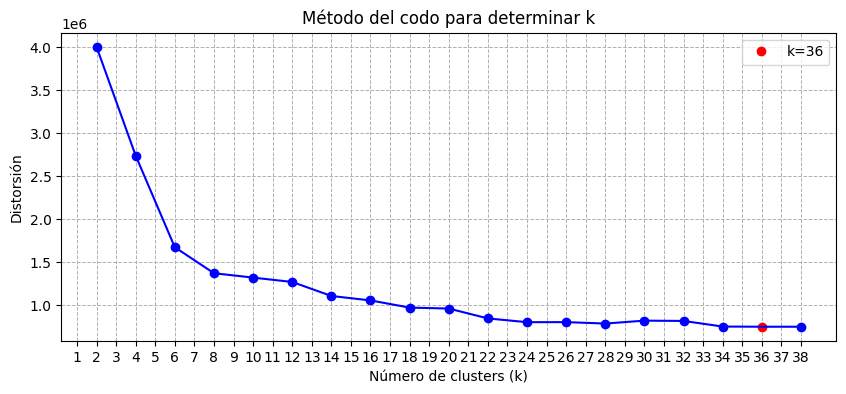

In [ ]:
# Plot the distortion in terms of k
plt.figure(figsize=(10, 4))

# Define x-values and plot all points except the one at x = 24
x_values = range(2, 39, 2)
for x, y in zip(x_values, distortions):
    if x == 36:
        plt.plot(x, y, 'ro', label='k=36')
    else:
        plt.plot(x, y, 'bo')

plt.plot(x_values, distortions, 'b-')
plt.xticks(range(1, 39))
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Distorsión')
plt.title('Método del codo para determinar k')
plt.legend()
plt.show()

The number of cluster chosen is 36 because is the minor number of cluster in a group with a similar major performance when the distortion is evaluated.

## 4.2. Evaluación del mejor modelo

In [ ]:
pandas_data = pd.DataFrame(numpy_data, columns=['Radiación Neta',
                                                'Ground Flux',
                                                'Temperatura del aire',
                                                'Curva de presión de vapor',
                                                'Constante psycométrica',
                                                'Presion de vapor saturado',
                                                'Presión de vapor actual',
                                                'Velocidad de viento'])
pandas_data

,Radiación Neta,Ground Flux,Temperatura del aire,Curva de presión de vapor,Constante psycométrica,Presion de vapor saturado,Presión de vapor actual,Velocidad de viento
0,-0.700287,0.002890,23.271332,0.172413,0.065426,2.856878,2.692569,1.362056
1,-0.711534,0.005719,23.122452,0.171082,0.065202,2.831687,2.681479,1.451124
2,-0.707647,0.006886,23.145279,0.171267,0.065523,2.835127,2.697322,1.356154
3,-0.716827,0.012507,23.134506,0.171155,0.066007,2.832945,2.725280,1.136015
4,-0.721148,0.014556,23.085724,0.170706,0.066254,2.824399,2.742847,1.007508
...,...,...,...,...,...,...,...,...
21053515,0.057175,0.028322,25.533035,0.193975,0.066171,3.269948,3.038742,1.163321
21053516,0.058424,0.029169,25.599014,0.194639,0.066178,3.282785,3.027036,1.161476
21053517,0.025057,0.047791,24.949921,0.188349,0.066186,3.161943,2.971297,1.102412
21053518,-0.004933,0.067797,24.265030,0.181598,0.066191,3.031817,2.917109,1.168465


In [ ]:
variables_flat = numpy_data
variables_flat = variables_flat[0:701784]
pandas_data=pandas_data.iloc[0:701784]

Input data flattered shape: (701784, 8)
Output layer label:         (701784, 1)
Joined array:               (701784, 9)
Reshaped joined array:      (171, 171, 216)


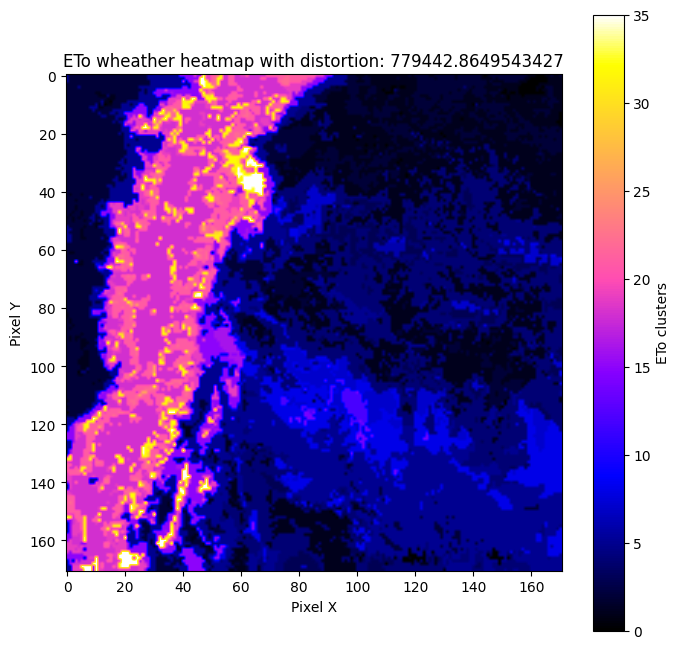

In [ ]:
# SOM model implementation
model_SOM_2 = Pipeline([('scal', StandardScaler()),
                        ('som', CustomSOM(m=12,#11
                                          n=3,#3
                                          dim=8,
                                          lr=1.491,         #Best 1.5
                                          max_iter=90,      #Best 1475   #40000 75 #con 90 obtengo 8050 #
                                          random_state=42)) #Best 42
                       ])

SOM_train_inicial = model_SOM_2[:-1].fit_transform(pandas_data)
SOM_train         = model_SOM_2[-1].fit(SOM_train_inicial)
labels_SOM_train  = model_SOM_2.named_steps['som'].predict(SOM_train_inicial)
distortion        = model_SOM_2.named_steps['som'].score(SOM_train_inicial)

plot_one_day_(numpy_data, labels_SOM_train)

## 5. Comparar estadísticamente 2 técnicas de ML (k-means y SOM).

* Para esto, use un test de hipótesis con repeated k-fold cross validation (10 repeticiones y k=10 folds).

In [ ]:
"""from sklearn.model_selection import RepeatedKFold
from scipy.stats import wilcoxon

rkf = RepeatedKFold(n_splits=10, n_repeats=10, )

SyntaxError: incomplete input (<ipython-input-83-ba04eeb04e17>, line 1)

In [ ]:
"""def evaluate_kmeans(X_train):
    model = Pipeline([
                        ('filter', VarianceThreshold(threshold=(0.1))),
                        ('polynomial_features', PolynomialFeatures(degree=2)),
                        ('scal', StandardScaler()),
                        ('kmeans', KMeans(n_clusters=3)),
                    ])
    kmeans_train            = model.fit_transform(X_train)
    labels_kmeans_train     = model.named_steps['kmeans'].labels_
    centers_kmeans_train    = model.named_steps['kmeans'].cluster_centers_
    distorsion_kmeans_train = model.named_steps['kmeans'].inertia_
    return distorsion_kmeans_train

def evaluate_som(X_train):
    dim = 15
    model_SOM_2 = Pipeline([

                    ('filter', VarianceThreshold(threshold=(0.1))),
                    ('polynomial_features', PolynomialFeatures(degree=2)),
                    ('scal', StandardScaler()),
                    ('som', CustomSOM(m=3, n=1, dim=dim, lr=0.1 , max_iter=50000))
                ])

    SOM_train_inicial       = model_SOM_2[:-1].fit_transform(X_train)
    dim                     = len(SOM_train_inicial[0])
    SOM_train               = model_SOM_2[-1].fit(SOM_train_inicial)
    labels_SOM_train        = model_SOM_2.named_steps['som'].predict(SOM_train_inicial)
    centers_SOM_train       = model_SOM_2.named_steps['som'].transform(SOM_train_inicial)
    distorcion_SOM_train    = model_SOM_2.named_steps['som'].score(SOM_train_inicial)
    return distorcion_SOM_train


In [ ]:
"""data_ETo_pvalue = data_clusterizador_train.copy()
data_ETo_pvalue = data_ETo_pvalue.drop(columns=['resolvedAddress'])

kmeans_scores = []
som_scores = []
contador = 0
for train_index, val_index in rkf.split(data_ETo_pvalue):
    X_train, X_val = data_ETo_pvalue.iloc[train_index,:], data_ETo_pvalue.iloc[val_index,:]
    contador = contador + 1
    print("Repetición: ",contador)

    kmeans_score = evaluate_kmeans(X_train)
    print("kmeans_score",kmeans_scores)
    #distorsion_kmeans_train = model.named_steps['kmeans'].inertia_
    kmeans_scores.append(kmeans_score)

    som_score = evaluate_som(X_train)
    print("som_scores",som_scores)
    #distorcion_SOM_train    = model_SOM_2.named_steps['som'].score(SOM_train_inicial)
    som_scores.append(som_score)

In [ ]:
("""np.array(som_scores) - np.array(kmeans_scores))

In [ ]:
"""# Calcular el test de Wilcoxon [2]
stat, p = wilcoxon(som_scores, kmeans_scores, alternative='greater')# alternative= "less"
print('Estadístico:',stat,' p-valor:', f"{p:.{20}f}")

# hipotesis: hay una diferencia minima entre técnicas; es decir: son similares
# hipotesis nula: no hay diferencia mínima entre técnicas; es decir: no son similares

# Interpretar el p-valor
alpha = 0.05
if p > alpha:
    print('No se rechaza la hipótesis nula (las técnicas no son similares)')
else:
    print('Se rechaza la hipótesis nula (las técnicas son similares)')

## 6. Optimización de hiper parámetros de SOM



In [ ]:
"""pandas_data = pd.DataFrame(numpy_data, columns=['Radiación Neta',
                                                'Ground Flux',
                                                'Temperatura del aire',
                                                'Curva de presión de vapor',
                                                'Constante psycométrica',
                                                'Presion de vapor saturado',
                                                'Presión de vapor actual',
                                                'Velocidad de viento'])
pandas_data

#variables_flat = variables_flat[0:701784]
pandas_data=pandas_data.iloc[0:701784]

In [ ]:
"""# Pipeline
from sklearn.preprocessing     import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing     import StandardScaler
from sklearn.pipeline          import Pipeline
from sklearn.cluster           import KMeans
from sklearn_som.som           import SOM
from sklearn.model_selection   import GridSearchCV
from sklearn.model_selection   import RepeatedKFold


# Optimización
kfold = RepeatedKFold(n_splits=2, n_repeats=2, random_state=45)

# Pipeline
model_SOM_data = Pipeline([
                            ('filter',              VarianceThreshold(threshold=(0.1))),
                            ('polynomial_features', PolynomialFeatures(degree=2)),
                            ('scal',                StandardScaler()),
                          ])

data_tratada_ETo_SOM_optimo = model_SOM_data.fit_transform(pandas_data)
data_tratada_ETo_SOM_optimo

In [ ]:
"""from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# Grid search configuration
param_grid = {'lr': [1e-15, 1e-12, 1e-11, 1e-10, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2]}

# Optional parameter for magnitude of change to each weight. Does not update over training (as does learning rate). Higher values mean more aggressive updates to weights.
tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
                            estimator = CustomSOM(m=3, n=1, dim=21, max_iter=50000),# sigma por default=1.7
                            param_grid = param_grid,
                            cv=tscv,
                            verbose=4,
                            return_train_score=True,
                            )

In [ ]:
"""Eto_SOM_optimizado = grid_search.fit(data_tratada_ETo_SOM_optimo)


In [ ]:
"""Eto_SOM_optimizado.best_score_

In [ ]:
"""results = Eto_SOM_optimizado.cv_results_
results.keys()

In [ ]:
"''mejor_lr = np.min(results['mean_test_score'])
mejor_lr


## 6.1 Presentar una gráfica de la optimización de lambda.

In [ ]:
"""val_score   = results['mean_test_score']
train_score = results['mean_train_score']
lrs      = results['param_lr'].data

plt.figure(figsize=(10, 6))
plt.plot(lrs, train_score, label='Train distorción', marker='o')
plt.plot(lrs, val_score, label='Validation distorción', marker='o')
#plt.xscale('log')
plt.xlabel('Tasas de aprendizaje')
plt.ylabel('Distorción')
plt.title('Training y Validación para la Distorción y la Tasa de Aprendizaje')
plt.grid(True)
plt.legend()
plt.show()

## 6.2  Presentar también la curva de aprendizaje

In [ ]:
"""from sklearn.model_selection import GridSearchCV, TimeSeriesSplit


val_scores  = []
train_scores = []

for i in range(2,20,1):
    param_grid = {'lr': [1e-12]}
    tscv = TimeSeriesSplit(n_splits=i)
    grid_search = GridSearchCV(
                                estimator = CustomSOM(m=3, n=1, dim=15, max_iter=50000),# sigma por default=1.7
                                param_grid = param_grid,
                                cv=tscv,
                                verbose=4,
                                return_train_score=True,
                                )

    Eto_SOM_optimizado = grid_search.fit(data_tratada_ETo_SOM_optimo)
    results = Eto_SOM_optimizado.cv_results_

    val_score   = results['mean_test_score'][0]
    train_score = results['mean_train_score'][0]
    print("Distorción promedio validación:",np.mean(val_score)  ,"split",i)
    print("Distorción promedio train:"     ,np.mean(train_score),"split",i)

    val_scores.append(val_score)
    train_scores.append(train_score)

In [ ]:
"""train_scores

In [ ]:
"""m = numeros = np.arange(1, 19)

plt.figure(figsize=(10, 6))
plt.plot(m, train_scores, label='Train distorción', marker='o')
plt.plot(m, val_scores, label='Validation distorción', marker='o')
plt.xlabel('split de datos')
plt.ylabel('Distorción')
plt.title('Training y Validación para la Distorción y split de datos')
plt.grid(True)
plt.legend()
plt.show()

## 6.3  Evaluación del modelo optimizado final

In [ ]:
"""data_clusterizador_test_0 = data_clusterizador_test.drop(columns=['resolvedAddress'])
data_clusterizador_test_0

In [ ]:
"""dim = 21



model_SOM_TRATAMIENTO_DATOS_TEST = Pipeline([

                                              ('filter', VarianceThreshold(threshold=(0.0005))),
                                              ('polynomial_features', PolynomialFeatures(degree=2)),
                                              ('scal', StandardScaler()),

                                             ])

SOM_datos_tratados_test = model_SOM_TRATAMIENTO_DATOS_TEST.fit_transform(data_clusterizador_test_0)

model_SOM_FINAL = Pipeline([

                    ('filter', VarianceThreshold(threshold=(0.1))),
                    ('polynomial_features', PolynomialFeatures(degree=2)),
                    ('scal', StandardScaler()),
                    ('som', CustomSOM(m=3, n=1, dim=dim, lr=0.5 , max_iter=50000))
                ])

SOM_train_inicial       = model_SOM_FINAL[:-1].fit_transform(data_ETo_SOM_2)
dim                     = len(SOM_train_inicial[0])
SOM_train               = model_SOM_FINAL[-1].fit(SOM_train_inicial)
labels_SOM_test         = model_SOM_FINAL.named_steps['som'].predict(SOM_datos_tratados_test)
centers_SOM_test        = model_SOM_FINAL.named_steps['som'].transform(SOM_datos_tratados_test)
distorcion_SOM_test     = model_SOM_FINAL.named_steps['som'].score(SOM_datos_tratados_test)

data_clusterizador_test['winner'] = None
contador =0
for x in range(len(labels_SOM_test)):
    data_clusterizador_test.loc[contador,'winner'] = str(labels_SOM_test[x])
    contador = contador + 1

data_clusterizador_test.winner  = data_clusterizador_test.winner.astype(int)
data_clusterizador_test

In [ ]:
"""colores = {0: 'yellow', 1: 'green', 2: 'purple'}

# Configurar la figura y los ejes
fig, axs = plt.subplots(4, 2, figsize=(15, 10))  # 4 filas, 2 columnas

# Título general para la figura
fig.suptitle('ETo en test para cuatro puntos diferentes para los años 2021 y 2022')

# Rellenar cada subplot
for i in range(4):
    Latitud_i  = float(data_clusterizador_test.resolvedAddress.unique()[i][ 0: 9  ])
    Longitud_j = float(data_clusterizador_test.resolvedAddress.unique()[i][ 10:19 ])
    for j in range(2):
        data_graficar = graficar_ETo(Latitud_i, Longitud_j, 2021+j, data_clusterizador_test)
        ax = axs[i, j]
        ax.plot(data_graficar.loc[:,'Date'], data_graficar.loc[:,'ETo'],  c="black", lw=.2)
        ax.scatter(data_graficar.loc[:,'Date'], data_graficar.loc[:,'ETo'], c=data_graficar.loc[:,'winner'].map(colores))
        ax.set_title(f'Latitud {Latitud_i}  Longitud {Longitud_j} Año {2021+j}')
        ax.set_xlabel('Número de mes')
        ax.set_ylabel('ETo')
        ax.grid(True)

# Ajustar automáticamente el layout para evitar que los subplots se solapen
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [ ]:
"""from sklearn.manifold import TSNE

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(SOM_datos_tratados_test)

# Graficar los resultados
plt.figure(figsize=(10, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c='g')
plt.title('Visualización de datos del conjunto de Test con t-SNE')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

## 7. Conclusiones:

* Se puede modificar un modelo de machine learning hasta cierto punto para evaluarlo con sklearn en caso de que no exista en librería.

* Al inicio de las pruebas no se tenía un rumbo por el cual poder asignar los valores de los hiperparámetros a los modelos kmeans y SOM; siendo el único camino la visualización y el ajuste fino.

* Posteriormente con las herramientas aprendidas en el curso se pudo poner a punto los modelos de manera automatizada con criterios estadísticos, matemáticos y técnicas especializadas como la del codo.

* Se puede profundizar más y optimizar cada hiperparámetro, pero esto conlleva tiempo, capacidad de cómputo por lo que abstrayendo al proyecto de tesis cuando se tenga altas cantidades de datos es necesario evaluar si en los resultados buscados amerita que el modelo tenga un alto performance versus el tiempo y los recursos.

## 8. Referencias:

[1] R. G. Allen, L. S. Pereira, D. Raes y M. Smith, “Crop Evapotranspiration: Guidelines for Computing Crop Water Requirements,” Food and Agriculture Organization of the United Nations (FAO), 1998, pp. 252.

[2] PROMT USADO CON CHAT GPT 3.5: Comparar en python estadísticamente 2 técnicas de ML (k-means y SOM) utilizando scipy.stats.wilcoxon con su p-value.

**Resultado:**

Importar las librerías necesarias:

* import numpy as np
* from sklearn.datasets import make_blobs
* from sklearn.model_selection import RepeatedKFold
* from sklearn.cluster import KMeans
* from sklearn.metrics import silhouette_score
* from sklearn_som.som import SOM
* from scipy.stats import wilcoxon

Crear un conjunto de datos de ejemplo:

    # Generar datos sintéticos
    X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
    Configurar el repeated k-fold cross validation:
    python

    # Configuración de k-fold cross validation
    rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
Definir las funciones para evaluar cada técnica:

    def evaluate_kmeans(X_train):
        model = KMeans(n_clusters=4, random_state=1)
        model.fit(X_train)
        labels = model.predict(X_train)
        return silhouette_score(X_train, labels)

    def evaluate_som(X_train):
        model = SOM(m=2, n=2, dim=2)
        model.fit(X_train)
        labels = model.predict(X_train)
        return silhouette_score(X_train, labels)
Realizar la validación cruzada y almacenar las puntuaciones:

    kmeans_scores = []
    som_scores = []

    for train_index, test_index in rkf.split(X):
        X_train, X_test = X[train_index], X[test_index]
    
        kmeans_score = evaluate_kmeans(X_train)
        kmeans_scores.append(kmeans_score)
    
        som_score = evaluate_som(X_train)
        som_scores.append(som_score)
Comparar las técnicas utilizando el test de Wilcoxon:

    # Calcular el test de Wilcoxon
    stat, p = wilcoxon(kmeans_scores, som_scores)
    print('Estadístico: %.3f, p-valor: %.3f' % (stat, p))

    # Interpretar el p-valor
    alpha = 0.05
    if p > alpha:
        print('No se rechaza la hipótesis nula (las técnicas son similares)')
    else:
        print('Se rechaza la hipótesis nula (las técnicas son diferentes)')


`Explicación de los pasos:`
* Importar las librerías: Necesitas numpy para manejar los datos, sklearn para las funciones de clustering y validación cruzada, sklearn_som para la implementación de SOM y scipy.stats para el test de Wilcoxon.

* Crear un conjunto de datos: Utilizamos make_blobs para generar datos sintéticos con 4 centros (clusters).

* Configurar el k-fold cross validation: Configuramos el repeated k-fold cross validation con 10 splits y 10 repeticiones.

* Definir las funciones para evaluar cada técnica: Creamos funciones para evaluar k-means y SOM, utilizando la métrica de Silhouette Score para medir la calidad del clustering.

* Realizar la validación cruzada: Para cada split del k-fold, entrenamos y evaluamos ambos modelos y almacenamos sus puntuaciones.

* Comparar las técnicas: Utilizamos el test de Wilcoxon para comparar las distribuciones de puntuaciones de ambas técnicas y determinamos si hay una diferencia significativa.

* Este procedimiento te permitirá comparar estadísticamente las dos técnicas de clustering y decidir si una es significativamente mejor que la otra.

